In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [11]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1jfU2oFSfhX1ywUbqETExDJuztO95r3h6pbWAm7xpwNY/gviz/tq?tqx=out:csv&sheet=users')
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


1. Is this a balanced data set?

2. Be sure to scale your data (try using the pipeline!)

3. What is the accuracy of your default model?

4. What is the optimal accuracy you can achieve by tuning the value of K using KNN?

5. Create a confusion matrix for your optimal KNN model.

## Is this a balanced dataset?

In [5]:
df['sex'].value_counts(normalize = True)

M    0.365813
I    0.321283
F    0.312904
Name: sex, dtype: float64

Yes, the data is balanced because we have almost a 33% split between the 3 possible targets

## Machine Learning

In [10]:
# Defining X and y, and splitting
X = df.drop('sex', axis = 1)
y = df['sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [7]:
# Instantiating the Scaler, the model, and the pipeline
scaler = StandardScaler()

KNN = KNeighborsClassifier()

KNNpipe = make_pipeline(scaler, KNN)

# Fitting the data
KNNpipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [9]:
def_acc = KNNpipe.score(X_test,y_test)
print(f'The default accuracy is {def_acc}')

The default accuracy is 0.5473684210526316


### Tuning K
Now to tune the number of neighbors for the algorithm

In [23]:
# Creating a dataframe to store the results
score_df = pd.DataFrame(index = neighbors, columns = ['Accuracy'])

In [24]:
# Creating a list of K's, then looping through them
neighbors = list(range(1,201))

for i in neighbors:
    model = KNeighborsClassifier(n_neighbors = i)
    pipe = make_pipeline(scaler, model).fit(X_train, y_train)
    score_df.loc[i,'Accuracy'] = pipe.score(X_test, y_test)

In [27]:
score_df.sort_values(by = 'Accuracy', ascending = False).head()

,Accuracy
102,0.585646
123,0.584689
117,0.583732
119,0.582775
118,0.582775


<AxesSubplot: >

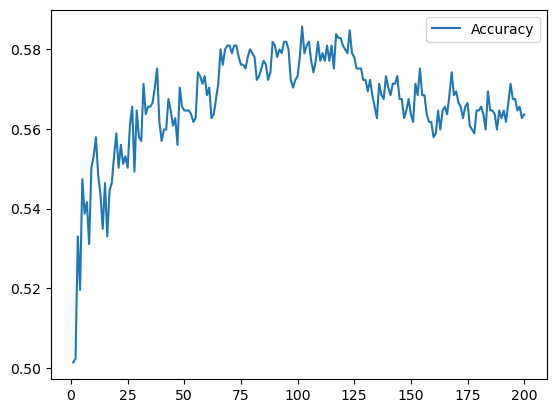

In [26]:
sns.lineplot(data = score_df)

Looks like the best is 102. We get diminishing returns after about 120

In [28]:
bestKNN = KNeighborsClassifier(n_neighbors=102)
bestKNNpipe = make_pipeline(scaler, bestKNN).fit(X_train, y_train)

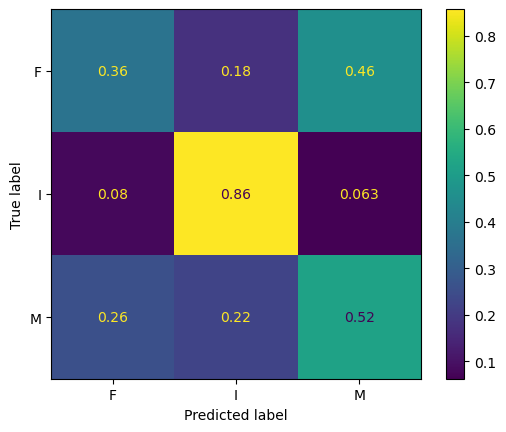

In [33]:
# Creating a Confusion Matrix for the best model

ConfusionMatrixDisplay.from_predictions(y_test, bestKNNpipe.predict(X_test), normalize='true')

The model did well at predicting Intersex, but it did a very poor job predicting Female, and a poor job predicting Male as well. 